In [1]:
#importing pandas libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

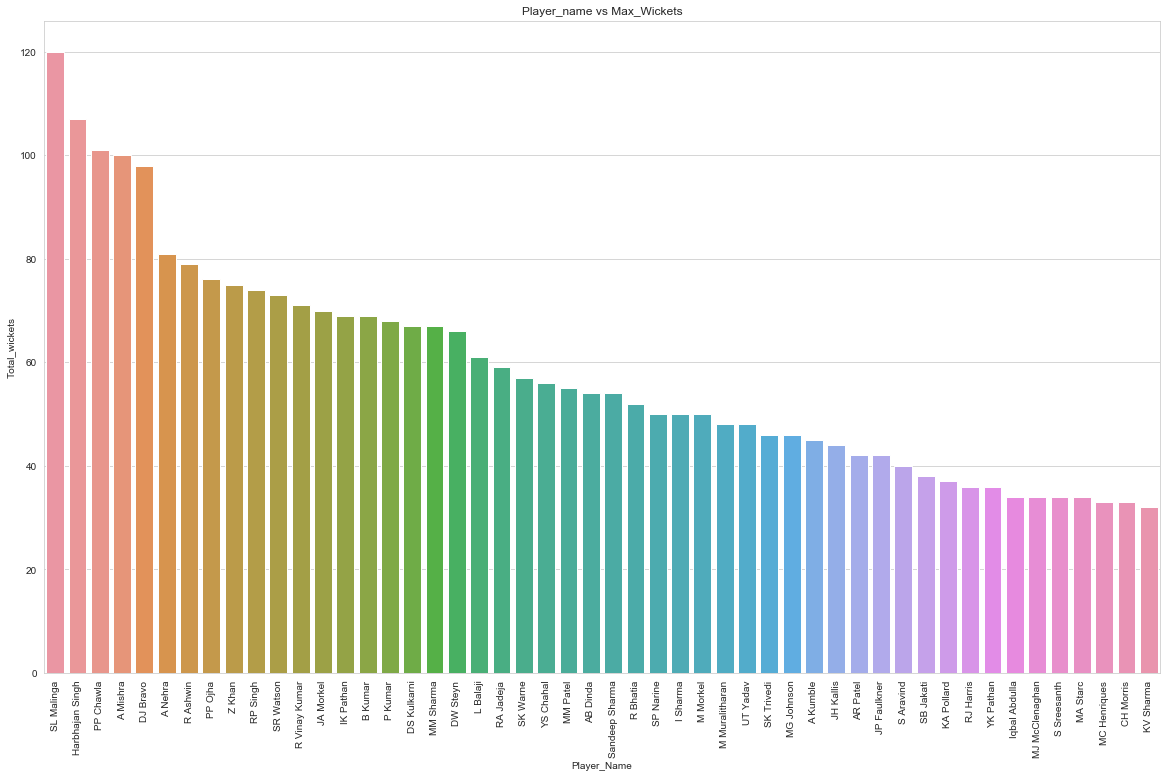

In [6]:
#players with most wickets

data=pd.read_csv('Ball_by_Ball.csv')
data1=pd.read_csv("Player.csv")
data2=pd.read_csv('Match.csv')
data3=pd.read_csv("Player_Match.csv")
data4=pd.read_csv('Season.csv')
data5=pd.read_csv("Team.csv")

data['Total']=data['Batsman_Scored']+data['Extra_Runs']
data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
data['Extra_Runs']=data['Extra_Runs'].replace(' ','0').astype(int)
ball=pd.DataFrame(data)
ball=ball.loc[(ball.Dissimal_Type != 'run out') & 
                             (ball.Dissimal_Type != 'hit wicket') & 
                             (ball.Dissimal_Type != ' ') & (ball.Dissimal_Type != 'retired hurt')]
wicket=ball.groupby(['Bowler_Id'])
wickets=wicket['Dissimal_Type'].count()
a=pd.DataFrame(wickets)
player_name=data1.rename(index=str,columns={'Player_Id':'Bowler_Id'})
player_name=player_name.drop(['Is_Umpire','Unnamed: 7'],axis=1)
df=a.merge(player_name,on='Bowler_Id')
b=df.loc[:,['Bowler_Id','Player_Name','Dissimal_Type']].sort_values(by='Dissimal_Type',ascending=False).rename(columns={'Dissimal_Type':'Total_wickets'}).head(50)
name=b['Player_Name']
wickets=b['Total_wickets']

plt.figure(figsize=(20,12))
sns.barplot(y='Total_wickets', x="Player_Name", data=b)
plt.title('Player_name vs Max_Wickets')
plt.xticks(rotation=90)
plt.show()

#plt.bar(name,wickets,facecolor='c', edgecolor='b')

#plt.xlabel('Bowlers_Name')
#plt.ylabel('Total_Wickets')
#plt.title('Top bowlers with maximum wickets')

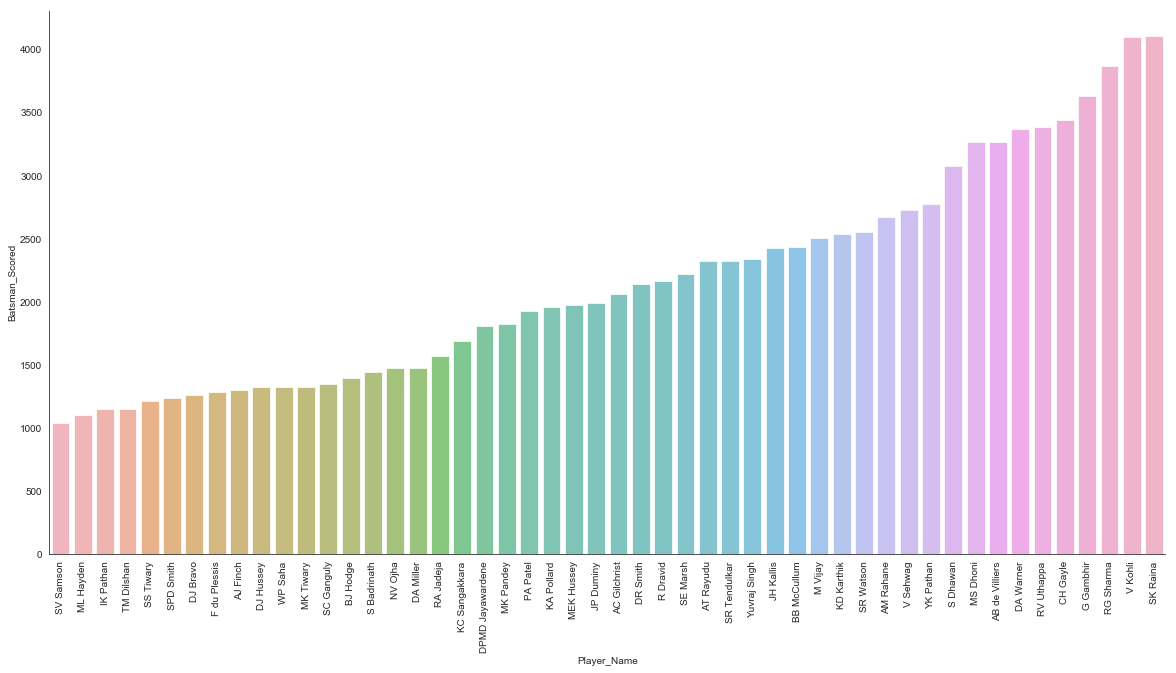

In [3]:
#highest runs

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
run=data.groupby(['Striker_Id'])
run1=run['Batsman_Scored'].sum().sort_values()
runs=pd.DataFrame(run1)
runs.sort_values(by='Batsman_Scored',ascending=False)
batsman=data1.rename(index=str,columns={'Player_Id':'Striker_Id'})
batsman=batsman.drop(['Is_Umpire','Unnamed: 7'],axis=1)
batsman_name=runs.merge(batsman,on='Striker_Id')
batsman_name=batsman_name.loc[:,['Striker_Id','Player_Name','Batsman_Scored']].sort_values(by='Batsman_Scored',ascending=True).tail(50)

sns.set_style("white")
plt.figure(figsize=(20,10))

grid=sns.barplot(x='Player_Name', 
              y='Batsman_Scored', 
              data=batsman_name, 
              alpha=0.7)
grid.set_xticklabels(rotation=90,labels= batsman_name.Player_Name)
# Show plot
sns.despine()
plt.show()
#sns.axes_style

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69],
 <a list of 70 Text xticklabel objects>)

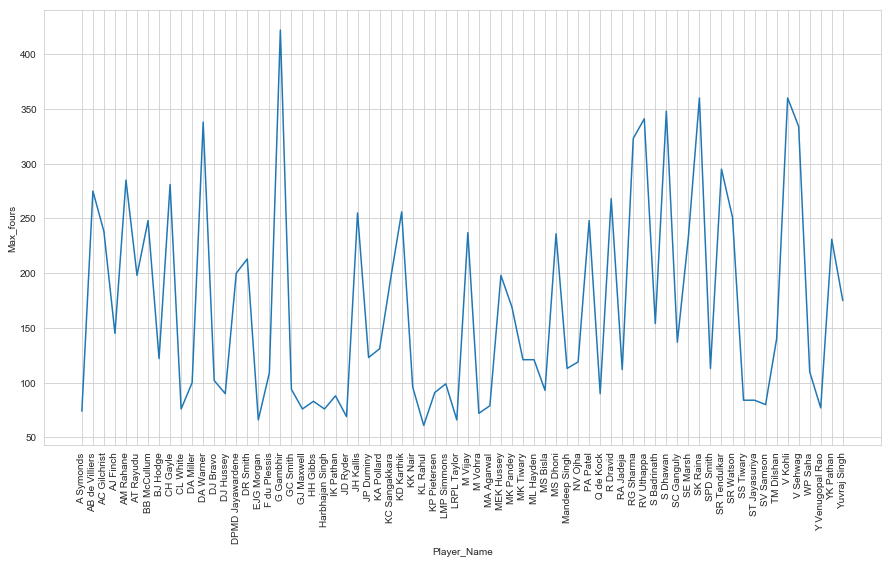

In [4]:
#max fours

data['Batsman_Scored']=data['Batsman_Scored'].astype(str)
four=data[data['Batsman_Scored'] == '4']
a=four.groupby('Striker_Id')['Batsman_Scored'].count()
b=pd.DataFrame({'Player_Id': a.index, 'Max_fours':a.values})
b.sort_values(by='Max_fours',ascending=False)
max_fours=b.merge(data1,on='Player_Id')
max_fours=max_fours.loc[:,['Player_Name','Max_fours']].sort_values(by='Max_fours',ascending=False).head(70)

sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.lineplot(x='Player_Name',y='Max_fours',data=max_fours)
plt.xticks(rotation=90)

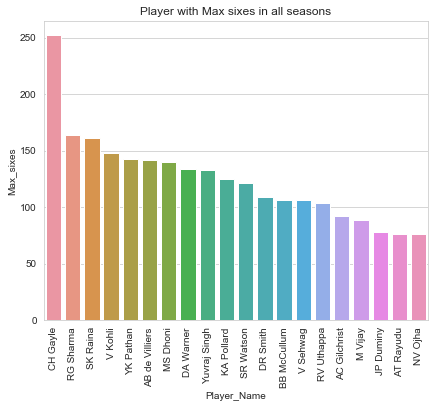

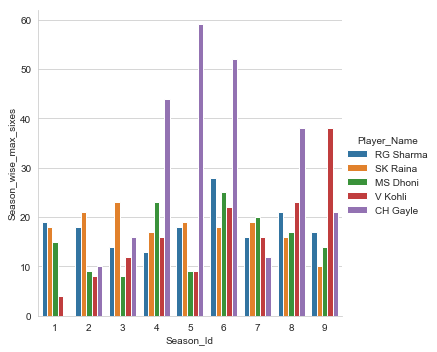

In [7]:
#max_sixes

ball2=pd.DataFrame(data)
six=ball2[ball2['Batsman_Scored'] == 6]

a=six.groupby('Striker_Id')['Batsman_Scored'].count()
b=pd.DataFrame({'Player_Id': a.index, 'Max_sixes':a.values})
b=b.sort_values(by='Max_sixes',ascending=False)
max_sixes=b.merge(data1,on='Player_Id')
max_sixes=max_sixes.loc[:,['Player_Name','Max_sixes']].sort_values(by='Max_sixes',ascending=False).head(20)


#season wise max sixes


s_six=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
s_six=ball2[ball2['Batsman_Scored'] == 6]
season=data2.loc[:,('Match_Id','Season_Id')]
s_six=s_six.merge(season,on='Match_Id')
season_six=s_six.groupby(['Season_Id','Striker_Id'])['Batsman_Scored'].count().reset_index()

player=data1.loc[:,('Player_Id','Player_Name')].rename(columns={'Player_Id':'Striker_Id'})
season_six=season_six.merge(player,on='Striker_Id').rename(columns={'Batsman_Scored':'Season_wise_max_sixes'})
season_six=season_six.sort_values(by=['Season_Id','Season_wise_max_sixes'],ascending=[True,False]).drop('Striker_Id',axis=1)
season_six=season_six.loc[(season_six.Player_Name=='SK Raina') | (season_six.Player_Name=='MS Dhoni') | (season_six.Player_Name=='V Kohli') | (season_six.Player_Name=='RG Sharma') | (season_six.Player_Name=='CH Gayle'),:]

plt.figure(figsize=(6.89,5.5))
plt.title('Player with Max sixes in all seasons')
sns.barplot(x='Player_Name', y="Max_sixes", data=max_sixes)
plt.xticks(rotation=90)

sns.catplot(x="Season_Id", y="Season_wise_max_sixes",kind='bar',hue="Player_Name",data=season_six)

#max_sixes


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

<Figure size 1080x720 with 0 Axes>

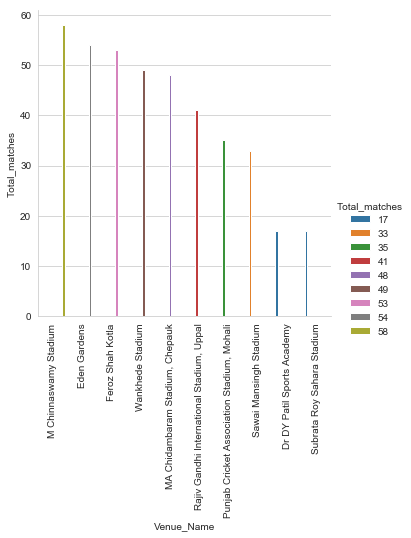

In [8]:
#matches in each stadium

vnu=data2.groupby('Venue_Name')
venue=vnu['Match_Id'].count()
most_matches=pd.DataFrame(venue)
most_matches=most_matches.sort_values(by='Match_Id',
                    ascending=False).head(10).reset_index().rename(columns={'Match_Id':'Total_matches'})

plt.figure(figsize=(15,10))
sns.catplot(x="Venue_Name", y="Total_matches", hue="Total_matches",
            kind="bar", data=most_matches)
plt.xticks(rotation=90)

#plt.figure(figsize=(15,10))
#plt.pie(most_matches['Venue_Name'],labels=most_matches['Total_matches'],startangle=90)
#plt.axis('equal')
#plt.legend(most_matches.Total_matches)
#plt.title('WICKET TYPES AND THEIR COUNT')
#plt.show()

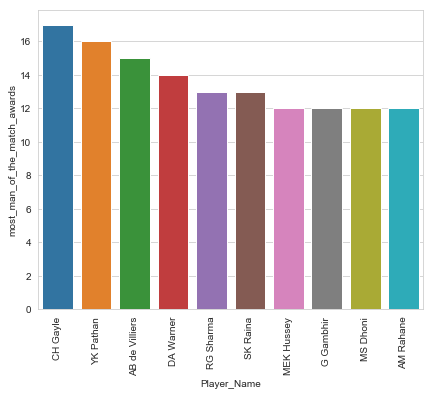

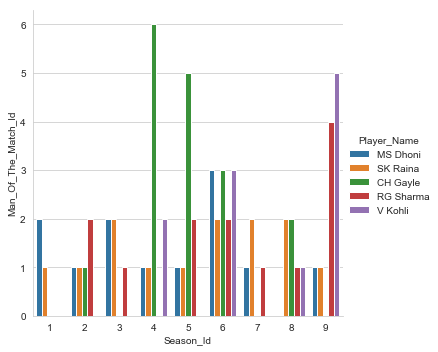

In [9]:
#man of the match

data2['Man_Of_The_Match_Id']=data2['Man_Of_The_Match_Id'].astype(str).astype(float)
a=data2.loc[:,('Match_Id','Man_Of_The_Match_Id')]
data1['Player_Id']=data1['Player_Id'].astype(float)
b=data1.loc[:,('Player_Id','Player_Name')]
c=b.rename(index=str,columns={'Player_Id':'Man_Of_The_Match_Id'})
d=a.merge(c,on='Man_Of_The_Match_Id')
e=d.sort_values(by='Man_Of_The_Match_Id')
l=e.groupby('Man_Of_The_Match_Id')['Player_Name'].count()
f=c.merge(l,on='Man_Of_The_Match_Id')
h=f.rename(columns={'Player_Name_x':'Player_Name','Player_Name_y':'most_man_of_the_match_awards'})
h=h.sort_values(by='most_man_of_the_match_awards',ascending=False).head(10)

#most man of the match in each season

data2['Man_Of_The_Match_Id']=data2['Man_Of_The_Match_Id'].astype(str).astype(float)
a=data2.loc[:,('Match_Id','Man_Of_The_Match_Id','Season_Id')]
data1['Player_Id']=data1['Player_Id'].astype(float)
b=data1.loc[:,('Player_Id','Player_Name')]
c=b.rename(index=str,columns={'Player_Id':'Man_Of_The_Match_Id'})
e=a.merge(c,on='Man_Of_The_Match_Id')
#e=d.sort_values(by='Man_Of_The_Match_Id')

e=e.groupby(['Season_Id','Player_Name'])['Man_Of_The_Match_Id'].count().reset_index()
season_mom=e.loc[(e.Player_Name=='SK Raina') | (e.Player_Name=='MS Dhoni') | (e.Player_Name=='V Kohli') | (e.Player_Name=='RG Sharma') | (e.Player_Name=='CH Gayle'),:]

plt.figure(figsize=(6.89,5.5))
#plt.title('Player with Max sixes in all seasons')
sns.barplot(x='Player_Name', y="most_man_of_the_match_awards", data=h)
plt.xticks(rotation=90)


sns.catplot(x="Season_Id", y="Man_Of_The_Match_Id",kind='bar',hue="Player_Name",data=season_mom)


In [10]:
#purple cap

pcap=data4.loc[:,('Season_Year','Purple_Cap_Id')]
plyr=data1.loc[:,('Player_Id','Player_Name')]
nw_plyr=plyr.rename(columns={'Player_Id':'Purple_Cap_Id'})
purplecap=nw_plyr.merge(pcap,on='Purple_Cap_Id')
purplecap.loc[:,('Player_Name','Season_Year')].sort_values(by='Season_Year')

,Player_Name,Season_Year
3,Sohail Tanvir,2008
0,RP Singh,2009
4,PP Ojha,2010
6,SL Malinga,2011
5,M Morkel,2012
1,DJ Bravo,2013
8,MM Sharma,2014
2,DJ Bravo,2015
7,B Kumar,2016


In [11]:
#orange cap

ocap=data4.loc[:,('Season_Year','Orange_Cap_Id')]
plyr1=data1.loc[:,('Player_Id','Player_Name')]
nw_plyr=plyr1.rename(columns={'Player_Id':'Orange_Cap_Id'})
orangecap=nw_plyr.merge(ocap,on='Orange_Cap_Id')
orangecap.loc[:,('Player_Name','Season_Year')].sort_values(by='Season_Year')

,Player_Name,Season_Year
4,SE Marsh,2008
1,ML Hayden,2009
5,SR Tendulkar,2010
6,CH Gayle,2011
7,CH Gayle,2012
2,MEK Hussey,2013
3,RV Uthappa,2014
8,DA Warner,2015
0,V Kohli,2016


In [12]:
#man of the series

mos=data4.loc[:,('Season_Year','Man_of_the_Series_Id')]
plyr2=data1.loc[:,('Player_Id','Player_Name')]
nw_plyr1=plyr2.rename(columns={'Player_Id':'Man_of_the_Series_Id'})
man_of_series=nw_plyr1.merge(mos,on='Man_of_the_Series_Id')
man_of_series.loc[:,('Player_Name','Season_Year')].sort_values(by='Season_Year')

,Player_Name,Season_Year
1,SR Watson,2008
3,AC Gilchrist,2009
4,SR Tendulkar,2010
5,CH Gayle,2011
7,SP Narine,2012
2,SR Watson,2013
6,GJ Maxwell,2014
8,AD Russell,2015
0,V Kohli,2016


In [13]:
#team matches and winners

match=data2.loc[:,('Match_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','Win_Type','Won_By')]
team_code=data5.loc[:,('Team_Id','Team_Short_Code')]
team_code=team_code.rename(columns={'Team_Id':'Team_Name_Id'})
a=match.merge(team_code,on='Team_Name_Id')
a=a.drop('Team_Name_Id',axis=1)
nteam_code=a.rename(columns={'Opponent_Team_Id':'Team_Name_Id','Team_Short_Code':'Team_Name'})
nteam_code=nteam_code.merge(team_code,on='Team_Name_Id')
nteam_code=nteam_code.drop('Team_Name_Id',axis=1)
oteam_name=nteam_code.rename(columns={'Match_Winner_Id':'Team_Name_Id','Team_Short_Code':'OppTeam_Name'})
oteam_name=oteam_name.merge(team_code,on='Team_Name_Id')
oteam_name=oteam_name.drop('Team_Name_Id',axis=1)
winner_team=oteam_name.rename(columns={'Team_Short_Code':'winner_team'})
winner_team=winner_team.sort_values(by='Match_Id').reset_index()
winner_team=winner_team.drop('index',axis=1)
winner_team=winner_team[['Match_Id','Team_Name','OppTeam_Name','winner_team','Win_Type','Won_By']].head(10)
winner_team

,Match_Id,Team_Name,OppTeam_Name,winner_team,Win_Type,Won_By
0,335987,RCB,KKR,KKR,by runs,140.0
1,335988,KXIP,CSK,CSK,by runs,33.0
2,335989,DD,RR,DD,by wickets,9.0
3,335990,MI,RCB,RCB,by wickets,5.0
4,335991,KKR,DC,KKR,by wickets,5.0
5,335992,RR,KXIP,RR,by wickets,6.0
6,335993,DC,DD,DD,by wickets,9.0
7,335994,CSK,MI,CSK,by runs,6.0
8,335995,DC,RR,RR,by wickets,3.0
9,335996,KXIP,MI,KXIP,by runs,66.0


In [14]:
#team match winnners and man of the match

mom=data2.loc[:,('Match_Id','Man_Of_The_Match_Id','Match_Date')]
plr=data1.loc[:,('Player_Id','Player_Name')]
plr=plr.rename(columns={'Player_Id':'Man_Of_The_Match_Id'})
mom=mom.merge(plr,on='Man_Of_The_Match_Id')
mom=mom.sort_values(by='Match_Id')
man_of_match=mom.merge(winner_team,on='Match_Id')
man_of_match=man_of_match.drop(columns='Man_Of_The_Match_Id').rename(columns={'Player_Name':'Man_of_the_match'})
man_of_match=man_of_match[['Match_Id','Match_Date','Team_Name','OppTeam_Name','winner_team','Win_Type','Won_By','Man_of_the_match']].head(10)
man_of_match

,Match_Id,Match_Date,Team_Name,OppTeam_Name,winner_team,Win_Type,Won_By,Man_of_the_match
0,335987,18-Apr-08,RCB,KKR,KKR,by runs,140.0,BB McCullum
1,335988,19-Apr-08,KXIP,CSK,CSK,by runs,33.0,MEK Hussey
2,335989,19-Apr-08,DD,RR,DD,by wickets,9.0,MF Maharoof
3,335990,20-Apr-08,MI,RCB,RCB,by wickets,5.0,MV Boucher
4,335991,20-Apr-08,KKR,DC,KKR,by wickets,5.0,DJ Hussey
5,335992,21-Apr-08,RR,KXIP,RR,by wickets,6.0,SR Watson
6,335993,22-Apr-08,DC,DD,DD,by wickets,9.0,V Sehwag
7,335994,23-Apr-08,CSK,MI,CSK,by runs,6.0,ML Hayden
8,335995,24-Apr-08,DC,RR,RR,by wickets,3.0,YK Pathan
9,335996,25-Apr-08,KXIP,MI,KXIP,by runs,66.0,KC Sangakkara


In [15]:
#Season Wise Winner

ssn=data2.loc[:,('Season_Id','Match_Winner_Id')]
winner=ssn.groupby('Season_Id').tail(1)
teams=data5.loc[:,('Team_Id','Team_Short_Code')]
teams=teams.rename(columns={'Team_Id':'Match_Winner_Id','Team_Short_Code':'Team_name'})
teams=teams.merge(winner,on='Match_Winner_Id')
teams=teams.sort_values(by='Season_Id').drop('Match_Winner_Id',axis=1)
Winner_teams=teams[['Season_Id','Team_name']].rename(columns={'Season_Id':'Season'
                                    ,'Team_name':'Winner_Team'})
Winner_teams

,Season,Winner_Team
4,1,RR
7,2,DC
2,3,CSK
3,4,CSK
0,5,KKR
5,6,MI
1,7,KKR
6,8,MI
8,9,SRH


In [16]:
#top 10 players of all seasons

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
run=data.groupby(['Striker_Id'])
run1=run['Batsman_Scored'].sum().sort_values()
runs=pd.DataFrame(run1)
runs.sort_values(by='Batsman_Scored',ascending=False)
batsman=data1.rename(index=str,columns={'Player_Id':'Striker_Id'})
batsman=batsman.drop(['Is_Umpire','Unnamed: 7'],axis=1)
batsman_name=runs.merge(batsman,on='Striker_Id')
batsman_name=batsman_name.loc[:,['Striker_Id','Player_Name','Batsman_Scored']].sort_values(by='Striker_Id')
matches=data.loc[:,('Match_Id','Striker_Id')]
matches=matches.groupby('Striker_Id')['Match_Id'].unique() 

#matches
l=[]
for i in range(len(matches.values)):
    a=matches.values[i]
    l.append(a.size)
batsman_name['Matches'] = l    
batsman_name['Average']= round(batsman_name['Batsman_Scored'] / batsman_name['Matches'])

#sixes
six=data[data['Batsman_Scored'] == 6]
six=six.groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
Top_10=six.merge(batsman_name,on='Striker_Id').rename(columns={'Batsman_Scored_x':'Sixes'})

#fours
fours=data[data['Batsman_Scored'] == 4]
fours=fours.groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
Top_10=fours.merge(Top_10,on='Striker_Id').rename(columns={'Batsman_Scored':'Fours','Batsman_Scored_y':'Total_runs'})

#Highest runs
data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
h_score=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
highest_runs=h_score.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum().reset_index()
highest_runs=highest_runs.drop('Match_Id',axis=1)
highest_runs=highest_runs.sort_values(by='Batsman_Scored',ascending=False)
highest_runs=highest_runs.drop_duplicates(subset='Striker_Id',keep='first')
Top_10=Top_10.merge(highest_runs,on='Striker_Id').rename(columns={'Batsman_Scored_x':'Total_runs',
                                'Batsman_Scored_y':'Highest_runs','Batsman_Scored':'Highest_runs'})
Top_10=Top_10.sort_values(by='Total_runs',ascending=False).head(10).drop('Striker_Id',axis=1)
Top_10=Top_10[['Player_Name','Matches','Total_runs','Average','Sixes','Fours','Highest_runs']]
Top_10

,Player_Name,Matches,Total_runs,Average,Sixes,Fours,Highest_runs
18,SK Raina,143,4106,29.0,161,360,100
7,V Kohli,131,4105,31.0,148,360,113
50,RG Sharma,137,3874,28.0,164,323,109
34,G Gambhir,130,3634,28.0,51,422,93
119,CH Gayle,91,3447,38.0,252,281,175
40,RV Uthappa,130,3390,26.0,104,341,83
133,DA Warner,100,3373,34.0,134,338,109
17,MS Dhoni,128,3270,26.0,140,236,70
93,AB de Villiers,109,3270,30.0,142,275,133
36,S Dhawan,112,3082,28.0,62,348,95


In [17]:
#total no of scores get by a bowler in all seasons

max_score=data.groupby('Bowler_Id')['Batsman_Scored'].count()
max_score=pd.DataFrame(max_score)
nw_plyr=plyr.rename(columns={'Player_Id':'Bowler_Id'})
max_score_bowler=nw_plyr.merge(max_score, on='Bowler_Id').sort_values(by='Batsman_Scored',ascending=False)
max_score_bowler=max_score_bowler.rename(columns={'Batsman_Scored':'Max_score_get'})
max_score_bowler.drop('Bowler_Id',axis=1).head(5)

,Player_Name,Max_score_get
29,Harbhajan Singh,2742
8,P Kumar,2529
41,PP Chawla,2472
87,A Mishra,2466
132,SL Malinga,2407


In [18]:
#total no of dot balls by players in all seasons

zeros=data[(data.Batsman_Scored==0)]
zeros=zeros.groupby('Striker_Id')['Batsman_Scored'].count()
max_zero=pd.DataFrame(zeros)
max_zero=max_zero.sort_values(by='Batsman_Scored',ascending=False)
player_name=data1.loc[:,('Player_Id','Player_Name')]
player_name=player_name.rename(columns={'Player_Id':'Striker_Id'})
player_name1=player_name.merge(max_zero,on='Striker_Id').sort_values(by='Batsman_Scored',ascending=False)
player_name1.drop('Striker_Id',axis=1).head(10).rename(columns={'Batsman_Scored':'Most_dot_balls'})

,Player_Name,Most_dot_balls
7,V Kohli,1193
39,G Gambhir,1167
45,RV Uthappa,1090
159,CH Gayle,1089
56,RG Sharma,1082
20,SK Raina,1081
41,S Dhawan,1077
8,JH Kallis,982
184,DA Warner,950
182,M Vijay,930


In [19]:


#super over

so=data2.loc[(data2.IS_Superover==1),('Match_Id','Match_Date','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','IS_Superover')]
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
so1=so.rename(columns={'Team_Name_Id':'Team_Id'})
so1=so1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
so1=so1.rename(columns={'Opponent_Team_Id':'Team_Id'})
so1=so1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
team=so1.rename(columns={'Team_Short_Code_x':'Team 1','Team_Short_Code_y':'opp_team','Match_Winner_Id':'Team_Id'})
Super_over=team.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
Super_over=Super_over[['Season_Id','Match_Id','IS_Superover','Match_Date','Team 1','opp_team','Team_Short_Code']].sort_values(by='Season_Id')
Super_over.rename(columns={'Team_Short_Code':'Winning_team'}).drop('IS_Superover',axis=1)

,Season_Id,Match_Id,Match_Date,Team 1,opp_team,Winning_team
0,2,392195,23-Apr-09,KKR,RR,RR
2,3,419126,21-Mar-10,CSK,KXIP,KXIP
4,6,598009,7-Apr-13,SRH,RCB,SRH
5,6,598022,16-Apr-13,RCB,DD,RCB
1,7,729320,29-Apr-14,KKR,RR,RR
3,8,829746,21-Apr-15,RR,KXIP,KXIP


In [20]:
#toss winning and match winning 

toss=data2.loc[:,('Match_Id','Match_Date','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','Toss_Winner_Id')]
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
toss1=toss.rename(columns={'Team_Name_Id':'Team_Id'})
toss1=toss1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss1=toss1.rename(columns={'Opponent_Team_Id':'Team_Id'})
toss1=toss1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss1=toss1.rename(columns={'Toss_Winner_Id':'Team_Id'})
toss2=toss1.rename(columns={'Team_Short_Code_x':'Team 1','Team_Short_Code_y':'opp_team'})
toss2=toss2.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss2=toss2.rename(columns={'Team_Short_Code':'Toss_winning_team'})
toss2=toss2.rename(columns={'Match_Winner_Id':'Team_Id'})
toss2=toss2.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
toss_winning_team=toss2.rename(columns={'Team_Short_Code':'Winning_team'})
toss_winning_team.sort_values(by='Match_Id').head(10)

,Match_Id,Match_Date,Season_Id,Team 1,opp_team,Toss_winning_team,Winning_team
0,335987,18-Apr-08,1,RCB,KKR,RCB,KKR
240,335988,19-Apr-08,1,KXIP,CSK,CSK,CSK
467,335989,19-Apr-08,1,DD,RR,RR,DD
116,335990,20-Apr-08,1,MI,RCB,MI,RCB
58,335991,20-Apr-08,1,KKR,DC,DC,KKR
147,335992,21-Apr-08,1,RR,KXIP,KXIP,RR
469,335993,22-Apr-08,1,DC,DD,DC,DD
218,335994,23-Apr-08,1,CSK,MI,MI,CSK
172,335995,24-Apr-08,1,DC,RR,RR,RR
325,335996,25-Apr-08,1,KXIP,MI,MI,KXIP


In [21]:
#total_wins_as_captain

captain=data3.loc[(data3.Is_Captain== 1),('Match_Id','Player_Id','Is_Captain','Team_Id')]
t=data2.loc[:,('Match_Id','Season_Id','Team_Name_Id','Opponent_Team_Id','Match_Winner_Id')]
table=t.merge(captain, on='Match_Id')
table=table.loc[(table.Is_Captain == 1)]
table=table.loc[(table.Match_Winner_Id== table.Team_Id)]
table=table.groupby('Player_Id')['Match_Winner_Id'].count()
captain_win=pd.DataFrame(table)
c=data1.loc[:,('Player_Id','Player_Name')]
captain_win=c.merge(captain_win,on='Player_Id')
captain_win=captain_win.sort_values(by='Match_Winner_Id',ascending=False).head(5)
captain_win.rename(columns={'Match_Winner_Id':'Total_wins_as_captain'})

,Player_Id,Player_Name,Total_wins_as_captain
8,20.0,MS Dhoni,83
14,40.0,G Gambhir,61
5,8.0,V Kohli,37
20,53.0,AC Gilchrist,35
22,57.0,RG Sharma,34


In [22]:
#total matches in all seasons

matches=data2.loc[:,('Season_Id','Match_Id')]
matches=matches.groupby('Season_Id')['Match_Id'].count()
pd.DataFrame(matches).reset_index().rename(columns={'Match_Id':'Total_Matches'})



,Season_Id,Total_Matches
0,1,58
1,2,57
2,3,60
3,4,73
4,5,74
5,6,76
6,7,60
7,8,59
8,9,60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

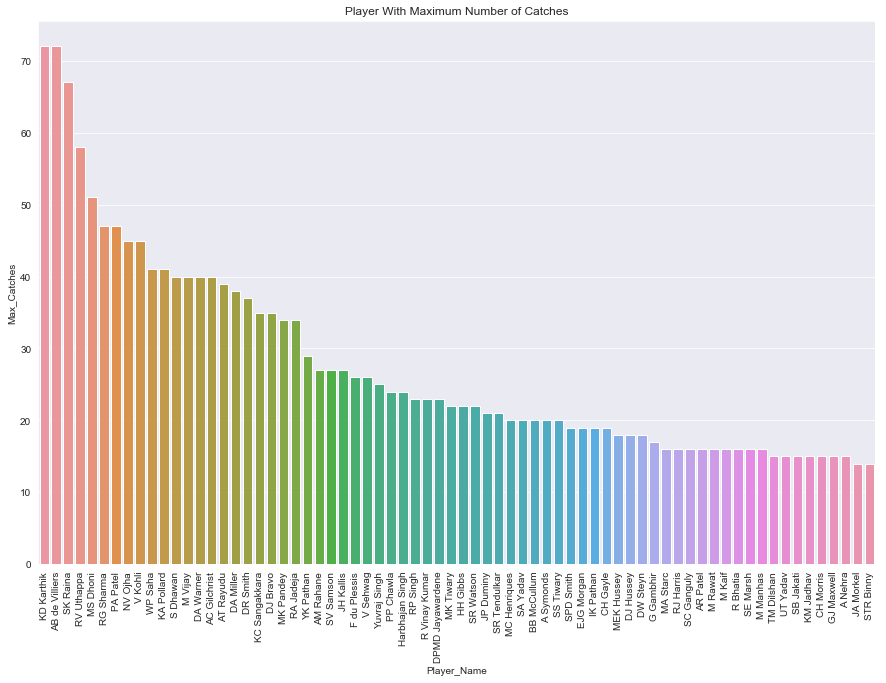

In [23]:
#max catches

catch=data.loc[data.Dissimal_Type=='caught',('Dissimal_Type','Fielder_Id')]
catch['Fielder_Id']=catch['Fielder_Id'].astype(str).astype(float)
catch=catch.groupby('Fielder_Id')['Dissimal_Type'].count()
plr=data1.loc[:,('Player_Id','Player_Name')]
plr = plr.rename (columns={'Player_Id':'Fielder_Id'})
catches=plr.merge(catch,on='Fielder_Id')
catches=catches.sort_values(by='Dissimal_Type',ascending=False).drop('Fielder_Id'
    ,axis=1).head(70).rename(columns={'Dissimal_Type':'Max_Catches'})

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Player_Name', y="Max_Catches", data=catches)
plt.title('Player With Maximum Number of Catches')
plt.xticks(rotation=90)

In [24]:
#team and players

ab=data3.loc[:,('Player_Id','Team_Id')].sort_values(by='Team_Id')
ab['Player_Id']=ab['Player_Id'].astype(float)
plr=data1.loc[:,('Player_Id','Player_Name')]
player=plr.merge(ab,on='Player_Id')
player=player.groupby('Team_Id')['Player_Name'].unique()
a1=pd.Series(player[1])
a2=pd.Series(player[2])
a3=pd.Series(player[3])
a4=pd.Series(player[4])
a5=pd.Series(player[5])
a6=pd.Series(player[6])
a7=pd.Series(player[7])
a8=pd.Series(player[8])
a9=pd.Series(player[9])
a10=pd.Series(player[10])
a11=pd.Series(player[11])
a12=pd.Series(player[12])
a13=pd.Series(player[13])

dict1={'KKR':a1.values,'RCB':a2.values,'CSK':a3.values,'KXIP':a4.values,'RR':a5.values,'DD':a6.values,'MI':a7.values,'DC':a8.values,'KTK':a9.values,'PW':a10.values,'SRH':a11.values,'RPS':a12.values,'GL':a13.values}
df = pd.DataFrame.from_dict(dict1, orient='index')
df=df.T.head(20)
df
#sns.distplot(df, kde=False, rug=True)


,KKR,RCB,CSK,KXIP,RR,DD,MI,DC,KTK,PW,SRH,RPS,GL
0,SC Ganguly,R Dravid,BB McCullum,DJ Hussey,R Dravid,Z Khan,RT Ponting,CL White,BB McCullum,SC Ganguly,CL White,MS Dhoni,BB McCullum
1,BB McCullum,W Jaffer,DJ Hussey,P Kumar,JDP Oram,JR Hopes,P Kumar,PA Patel,B Akhil,Yuvraj Singh,P Kumar,IK Pathan,P Kumar
2,RT Ponting,V Kohli,PA Patel,K Goel,T Kohli,Yuvraj Singh,Z Khan,KC Sangakkara,PA Patel,M Rawat,PA Patel,RP Singh,SK Raina
3,DJ Hussey,JH Kallis,ML Hayden,JR Hopes,YK Pathan,IK Pathan,PA Patel,S Dhawan,RA Jadeja,RV Uthappa,KC Sangakkara,SS Tiwary,RA Jadeja
4,Mohammad Hafeez,CL White,MEK Hussey,KC Sangakkara,SR Watson,G Gambhir,MEK Hussey,AC Gilchrist,VVS Laxman,AM Nayar,Yuvraj Singh,I Sharma,DJ Bravo
5,JH Kallis,MV Boucher,MS Dhoni,Yuvraj Singh,M Kaif,V Sehwag,JDP Oram,Y Venugopal Rao,RP Singh,LRPL Taylor,IK Pathan,AM Rahane,DS Kulkarni
6,MV Boucher,B Akhil,SK Raina,SM Katich,DS Lehmann,S Dhawan,S Dhawan,VVS Laxman,DPMD Jayawardene,A Nehra,S Dhawan,R Bhatia,KD Karthik
7,YK Pathan,AA Noffke,JDP Oram,IK Pathan,RA Jadeja,LRPL Taylor,L Ronchi,A Symonds,S Sreesanth,GC Smith,Y Venugopal Rao,AB Dinda,DW Steyn
8,G Gambhir,P Kumar,S Badrinath,T Kohli,M Rawat,Y Venugopal Rao,ST Jayasuriya,RG Sharma,R Vinay Kumar,M Kartik,A Nehra,JA Morkel,PJ Sangwan
9,RV Uthappa,Z Khan,RA Jadeja,M Kaif,D Salunkhe,LR Shukla,DJ Thornely,SB Styris,BJ Hodge,MK Pandey,I Sharma,KP Pietersen,DR Smith


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

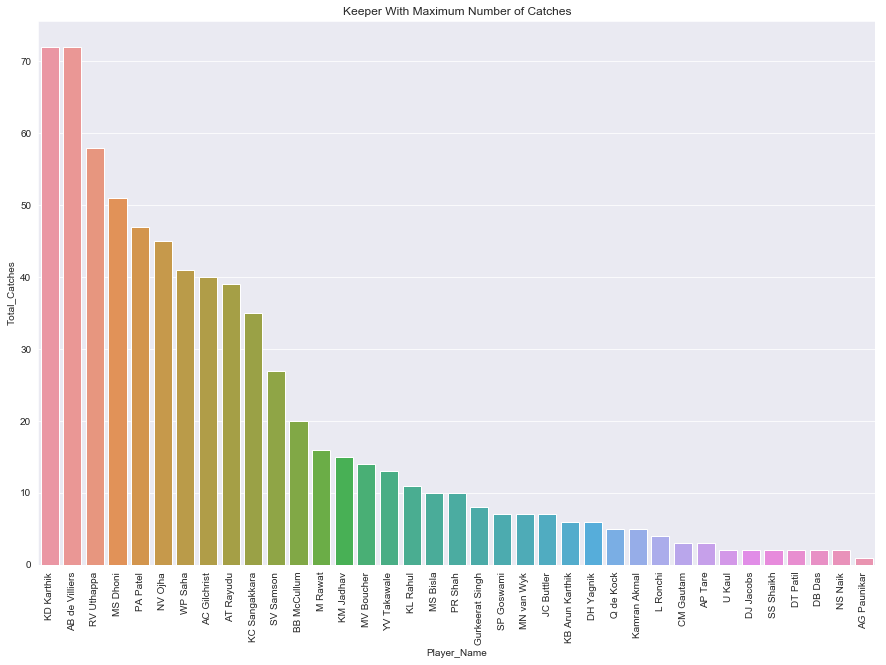

In [25]:
#keeper with max no of catches

keeper=data3.loc[data3.Is_Keeper==1]['Player_Id'].unique()
keeper=pd.Series(keeper)
keeper=pd.DataFrame({'Player_Id':keeper.values})
player=data.loc[data.Dissimal_Type=='caught',('Dissimal_Type','Fielder_Id','Match_Id')]
player['Fielder_Id']=player['Fielder_Id'].astype(str).astype(float)
player=player.rename(columns={'Fielder_Id':'Player_Id'})
player=player.groupby('Player_Id')['Dissimal_Type'].count()
player=pd.DataFrame(player)
player=player.sort_values(by='Dissimal_Type',ascending=False)
plr=data1.loc[:,('Player_Id','Player_Name')]
keeper_name=plr.merge(player,on='Player_Id')
keeper_name=keeper_name.merge(keeper,on='Player_Id')
keeper_name=keeper_name.rename(columns={'Dissimal_Type':'Total_Catches'})
total_catches=keeper_name.sort_values(by='Total_Catches',ascending=False)

plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Player_Name', y="Total_Catches", data=total_catches)
plt.title('Keeper With Maximum Number of Catches')
plt.xticks(rotation=90)

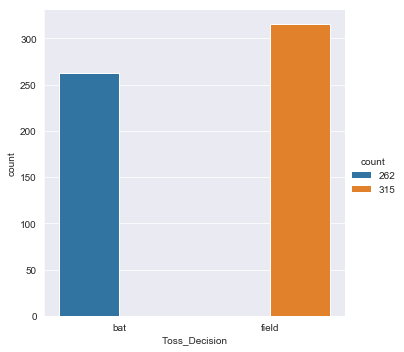

In [26]:
#total number of batting and fieling teams

a=data2.loc[:,('Team_Name_Id','Opponent_Team_Id','Match_Id'
               ,'Toss_Decision')]
a=a.groupby('Toss_Decision')['Match_Id'].count().reset_index().rename(columns={'Match_Id':'count'})

sns.catplot(x="Toss_Decision", y="count", hue="count",
            kind="bar", data=a)
#sns.countplot(x="Toss_Decision", data=a,hue='count')

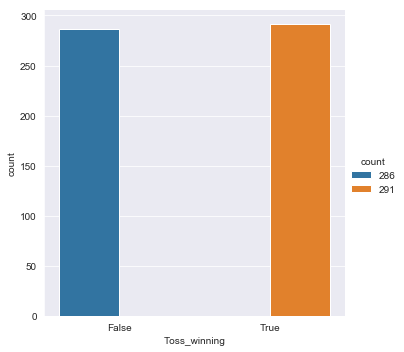

In [26]:
#toss winning help in match winning

ss=data2['Toss_Winner_Id'] == data2['Match_Winner_Id']
ss=ss.groupby(ss).count().reset_index()

ss=ss.rename(columns={'index':'Toss_winning' ,0:'count'})

sns.catplot(x="Toss_winning", y="count", hue="count",
            kind="bar", data=ss)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

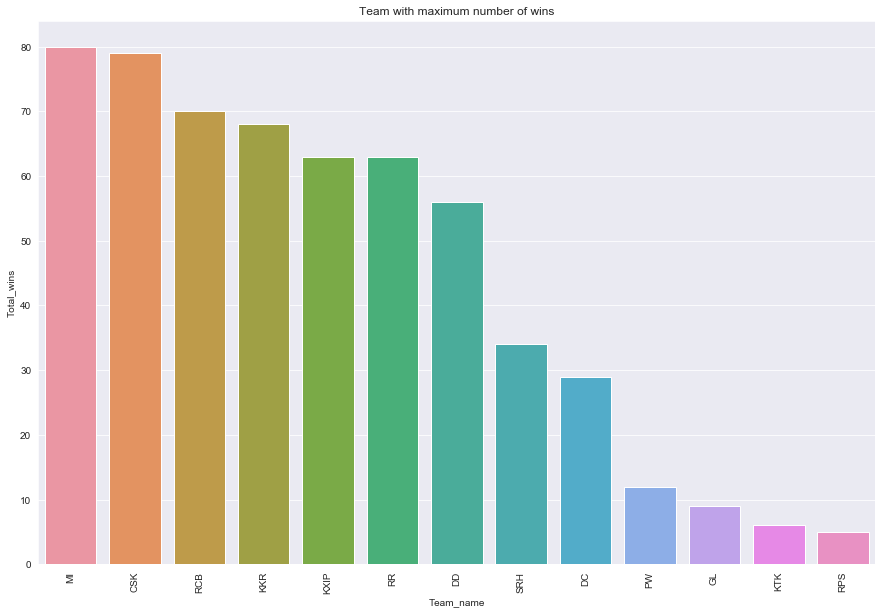

In [27]:
#most successful IPL team

successful_team=data2.Match_Winner_Id.value_counts().reset_index()
successful_team=successful_team.rename(columns={'index':'Team_Id'})
teams=data5.loc[:,('Team_Id','Team_Short_Code')]
teams=teams.rename(columns={'Team_Short_Code':'Team_name'})
teams=teams.merge(successful_team,on='Team_Id')
teams=teams.sort_values(by='Match_Winner_Id',ascending=False).drop('Team_Id'
    ,axis=1).rename(columns={'Match_Winner_Id':'Total_wins'})


plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Team_name', y="Total_wins", data=teams)
plt.title('Team with maximum number of wins')
plt.xticks(rotation=90)

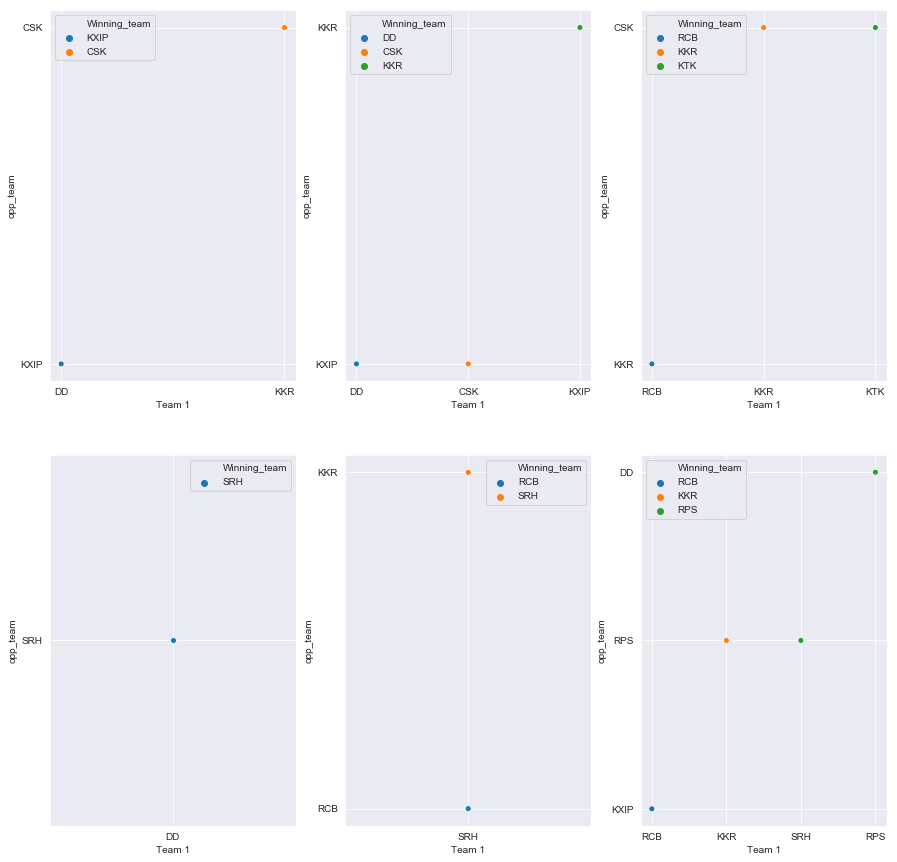

In [28]:
#D/Wl

dl=data2.loc[(data2.Is_DuckWorthLewis==1),('Match_Id','Match_Date','Season_Id',
        'Team_Name_Id','Opponent_Team_Id','Match_Winner_Id','Win_Type','Is_DuckWorthLewis','Won_By')]
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
do1=dl.rename(columns={'Team_Name_Id':'Team_Id'})
dl1=do1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
dl1=dl1.rename(columns={'Opponent_Team_Id':'Team_Id'})
dl1=dl1.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
team=dl1.rename(columns={'Team_Short_Code_x':'Team 1','Team_Short_Code_y':'opp_team','Match_Winner_Id':'Team_Id'})
dwl=team.merge(tm,on='Team_Id').drop('Team_Id',axis=1)
dwl=dwl[['Season_Id','Match_Id','Match_Date','Team 1','opp_team','Team_Short_Code']].sort_values(by='Season_Id')
dwl=dwl.rename(columns={'Team_Short_Code':'Winning_team'})

s1=dwl.loc[dwl.Season_Id==1,:]
x=s1['Team 1']
y=s1['opp_team']
s2=dwl.loc[dwl.Season_Id==2,:]
x1=s2['Team 1']
y1=s2['opp_team']
s3=dwl.loc[dwl.Season_Id==4,:]
x2=s3['Team 1']
y2=s3['opp_team']
s4=dwl.loc[dwl.Season_Id==7,:]
x3=s4['Team 1']
y3=s4['opp_team']
s5=dwl.loc[dwl.Season_Id==8,:]
x4=s5['Team 1']
y4=s5['opp_team']
s6=dwl.loc[dwl.Season_Id==9,:]
x5=s6['Team 1']
y5=s6['opp_team']

f,axes=plt.subplots(2,3,figsize=(15,15))

sns.scatterplot(x,y,hue="Winning_team",data=s1,ax=axes[0,0])
sns.scatterplot(x1,y1,hue="Winning_team",data=s2,ax=axes[0,1])
sns.scatterplot(x2,y2,hue="Winning_team",data=s3,ax=axes[0,2])
sns.scatterplot(x3,y3,hue="Winning_team",data=s4,ax=axes[1,0])
sns.scatterplot(x4,y4,hue="Winning_team",data=s5,ax=axes[1,1])
sns.scatterplot(x5,y5,hue="Winning_team",data=s6,ax=axes[1,2])



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

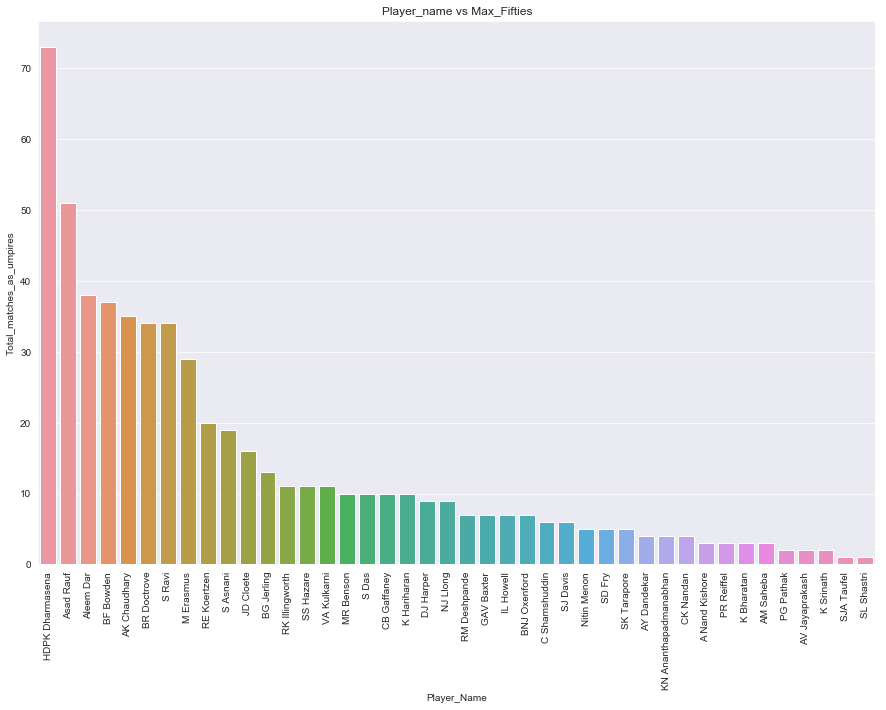

In [29]:
#Umpires count

u=data2.loc[:,('First_Umpire_Id','Match_Id')]
ump=data1.loc[(data1.Is_Umpire == 1),('Player_Id','Player_Name','Country')]
ump=ump.rename(columns={'Player_Id':'First_Umpire_Id'})
bowden=ump.merge(u,on='First_Umpire_Id')
bowden= bowden.groupby('Player_Name')['Match_Id'].count()
umpire=pd.DataFrame(bowden).sort_values(by='Match_Id'
    ,ascending=False).reset_index().rename(columns={'Match_Id':'Total_matches_as_umpires'})


plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x='Player_Name', y="Total_matches_as_umpires", data=umpire)
plt.title('Player_name vs Max_Fifties')
plt.xticks(rotation=90)
#plt.figure(figsize=(15,10))
 
#sns.countplot(x="Player_Name", data=umpire)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66],
 <a list of 67 Text xticklabel objects>)

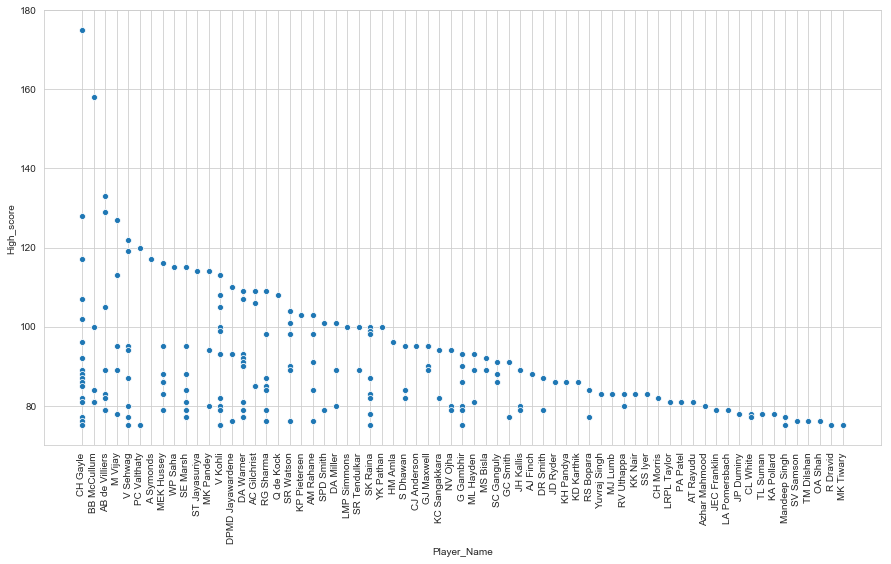

In [30]:
#top score by any player

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
score=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
highest=score.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum()
highest=pd.DataFrame(highest).reset_index()
highest=highest.rename(columns={'Striker_Id':'Player_Id'})
player_name=data1.loc[:,('Player_Id','Player_Name')]
player_name=player_name.merge(highest,on='Player_Id').sort_values(by='Batsman_Scored',
ascending=False).drop(['Match_Id','Player_Id'],axis=1).rename(columns={'Batsman_Scored':'High_score'}).head(200)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8))


sns.scatterplot(x="Player_Name", y="High_score", data=player_name)
#sns.lineplot(x="Player_Name", y="High_score",
            # data=player_name)
#sns.boxplot(x="Player_Name", y="High_score", data=player_name)

#sns.catplot(x="Player_Name", y="High_score", 
           # kind="violin", data=player_name);0
#sns.barplot(x='Player_Name', y="High_score", data=player_name)
plt.xticks(rotation=90)


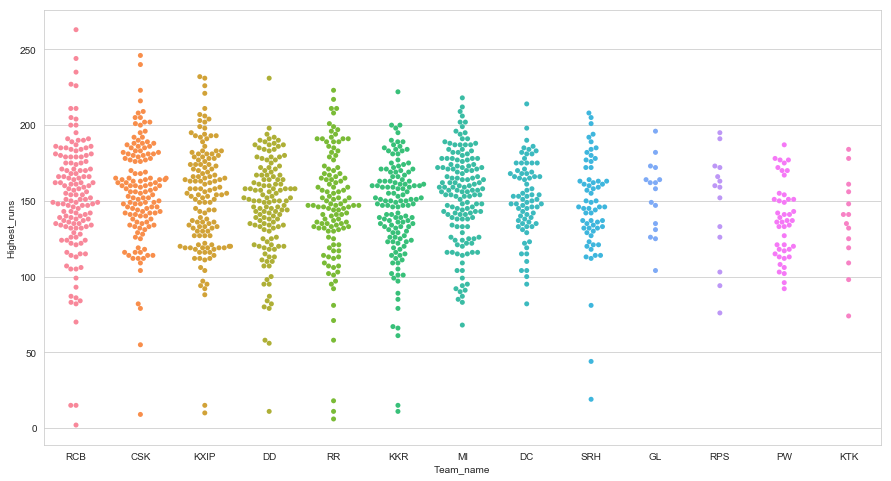

In [31]:
# highest score by individual teams
data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
data['Extra_Runs']=data['Extra_Runs'].replace(' ','0').astype(int)
data['Total']=data['Batsman_Scored']+data['Extra_Runs']
high=data.groupby(['Match_Id','Team_Batting_Id','Innings_Id'])['Total'].sum().reset_index()
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
do1=tm.rename(columns={'Team_Id':'Team_Batting_Id'})
high_score=do1.merge(high,on='Team_Batting_Id').drop(['Innings_Id',
     'Match_Id','Team_Batting_Id'],axis=1).sort_values(by='Total'
        ,ascending=False).rename(columns={'Team_Short_Code':'Team_name','Total':'Highest_runs'})

sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
#colors=['maroon','firebrick','black','gray','tan','goldenrod','olivedrab','darkseagreen'
      # ,'teal','cadetblue','orchid','indigo','lavender']
#sns.set_palette('BrBG')
sns.swarmplot(x="Team_name", y="Highest_runs",
               data=high_score)




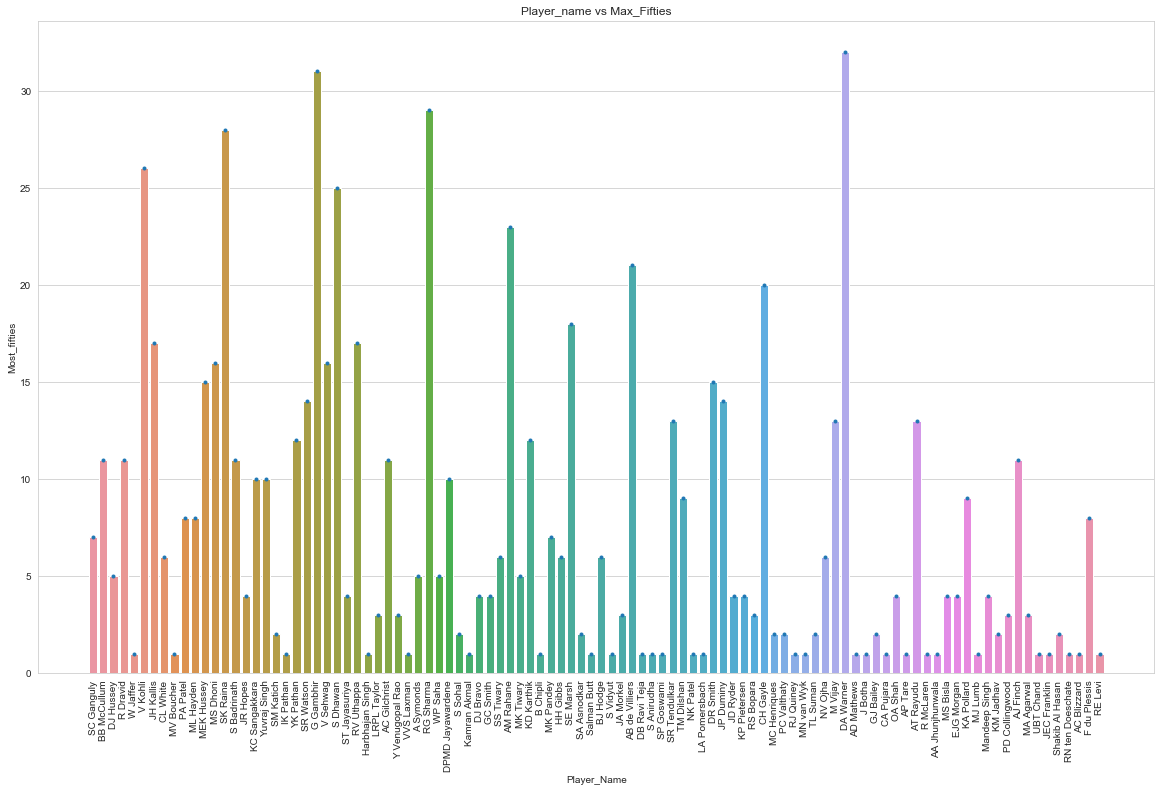

In [32]:
#Most_Fifties
fifty=data.groupby(['Match_Id','Striker_Id','Innings_Id'])['Batsman_Scored'].sum().reset_index()
fifty=fifty.loc[(fifty.Batsman_Scored >= 50) & (fifty.Batsman_Scored < 100),('Striker_Id',
      'Batsman_Scored')].groupby('Striker_Id')['Batsman_Scored'].count().reset_index()

plr=data1.loc[:,('Player_Id','Player_Name')]
plr = plr.rename (columns={'Player_Id':'Striker_Id'})
most_fifties=plr.merge(fifty,on='Striker_Id').drop('Striker_Id'
            ,axis=1).rename(columns={'Batsman_Scored':'Most_fifties'}).head(100)


x=most_fifties['Player_Name']
y=most_fifties['Most_fifties']
plt.figure(figsize=(20,12))
sns.barplot(x='Player_Name', y="Most_fifties", data=most_fifties)
plt.title('Player_name vs Max_Fifties')
plt.xticks(rotation=90)
plt.plot(x, y,'.')
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 <a list of 27 Text xticklabel objects>)

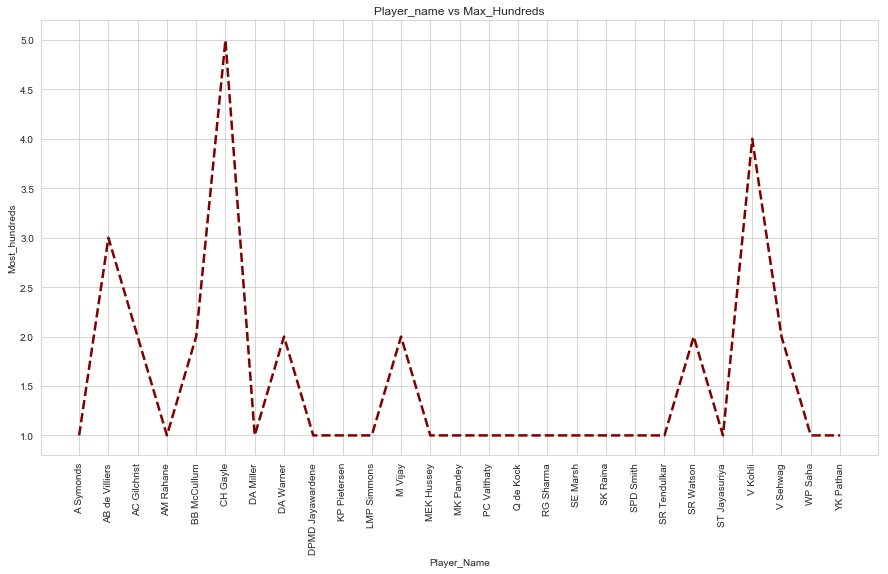

In [33]:

#most_hundreds

hundred=data.groupby(['Match_Id','Striker_Id','Innings_Id'])['Batsman_Scored'].sum().reset_index()
hundred=hundred.loc[(hundred.Batsman_Scored >= 100),('Striker_Id',
'Batsman_Scored')].groupby('Striker_Id')['Batsman_Scored'].count().reset_index()
hundred

plr=data1.loc[:,('Player_Id','Player_Name')]
plr = plr.rename (columns={'Player_Id':'Striker_Id'})
most_hundreds=plr.merge(hundred,on='Striker_Id').drop('Striker_Id',axis=1).sort_values(by='Batsman_Scored',
                                ascending=False).rename(columns={'Batsman_Scored':'Most_hundreds'})
#most_hundreds
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
grid=sns.lineplot(x='Player_Name', y='Most_hundreds', data=most_hundreds ,
                  linewidth=2.5,color='maroon')
plt.title('Player_name vs Max_Hundreds')
grid.lines[0].set_linestyle("--")
plt.xticks(rotation=90)

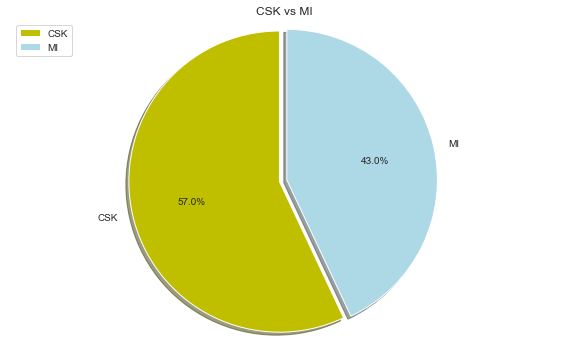

In [34]:
#csk vs MI rivelary

t_win=data2.loc[(data2.Team_Name_Id== 3) & (data2.Opponent_Team_Id== 7),('Season_Id',
                        'Team_Name_Id','Opponent_Team_Id','Match_Winner_Id')]
wins=t_win.Match_Winner_Id.value_counts()
wins=pd.DataFrame(wins).reset_index().rename(columns={'index':'Team_Id','Match_Winner_Id':'Total_wins'})
tm=data5.loc[:,('Team_Id','Team_Short_Code')]
total_wins=tm.merge(wins,on="Team_Id").drop('Team_Id',axis=1)
total_wins['win_percentage']=round((total_wins.Total_wins*100)/14)
total_wins

colors=['y','lightblue']

plt.figure(figsize=(8,5))
plt.pie(total_wins['win_percentage'],labels=total_wins['Team_Short_Code'],autopct='%1.1f%%'
        ,colors=colors,shadow=True,startangle=90,explode=(0.05,0))
plt.axis('equal')
plt.legend(total_wins.Team_Short_Code,loc=2)
plt.title('CSK vs MI')
plt.tight_layout()
plt.show()


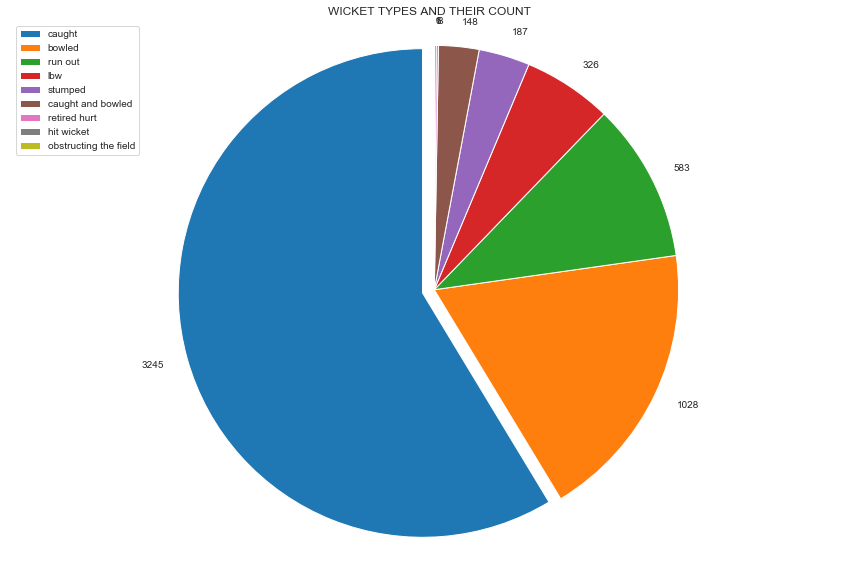

In [35]:
#dissmisal types and their counts

t_wickets=data.loc[(data.Dissimal_Type!=' '),('Match_Id','Dissimal_Type')]
t_wickets=t_wickets.Dissimal_Type.value_counts()
t_wickets=t_wickets.reset_index().rename(columns={'index':'Dissmisal_Type','Dissimal_Type':'Total'})

plt.figure(figsize=(15,10))
plt.pie(t_wickets['Total'],labels=t_wickets['Total'],shadow=False,startangle=90,explode=(0.05,0,
                                                            0,0,0,0,0,0,0))
plt.axis('equal')
plt.legend(t_wickets.Dissmisal_Type,loc=2)
plt.title('WICKET TYPES AND THEIR COUNT')
plt.show()

<Figure size 1080x720 with 0 Axes>

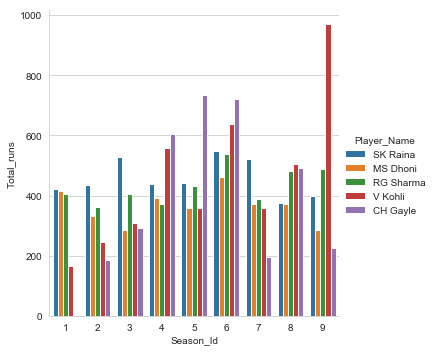

In [36]:
#player performance in each season

data['Batsman_Scored']=data['Batsman_Scored'].replace(' ','0')
data['Batsman_Scored']=data['Batsman_Scored'].replace('Do_nothing','0').astype(int)
h_score=data.loc[:,('Match_Id','Striker_Id','Batsman_Scored')]
season=data2.loc[:,('Match_Id','Season_Id')]
season=pd.merge(h_score,season,on='Match_Id')
highest_runs=season.groupby(['Season_Id','Striker_Id'])['Batsman_Scored'].sum().reset_index()
player=data1.loc[:,('Player_Id','Player_Name')].rename(columns={'Player_Id':'Striker_Id'})
highest_runs=highest_runs.sort_values(by='Batsman_Scored',ascending=False)
Top_10=highest_runs.merge(player,on='Striker_Id').rename(columns={'Batsman_Scored':'Total_runs'})
Top_10=Top_10.sort_values(by=['Season_Id','Total_runs'],ascending=[True,False]).drop('Striker_Id',axis=1)
#Top_10=Top_10[['Player_Name','Matches','Total_runs','Average','Sixes','Fours','Highest_runs']]
Top_10=Top_10[['Season_Id','Player_Name','Total_runs']]
Top_10=Top_10.loc[(Top_10.Player_Name=='SK Raina') | (Top_10.Player_Name=='MS Dhoni') | (Top_10.Player_Name=='V Kohli') | (Top_10.Player_Name=='RG Sharma') | (Top_10.Player_Name=='CH Gayle'),:]
plt.figure(figsize=(15,10))
sns.catplot(x="Season_Id", y="Total_runs", hue="Player_Name", kind="bar",
              data=Top_10);